In [138]:
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

In [139]:
df_people = pd.read_csv('./Data/People.csv')
df_people = df_people.set_index('FIPS').dropna()
df_jobs = pd.read_csv('./Data/Jobs.csv')
df_jobs = df_jobs.set_index('FIPS').dropna()
df_income = pd.read_csv('./Data/Income.csv')
df_income = df_income.set_index('FIPS').dropna()
df_county = pd.read_csv('./Data/County.csv')
df_county = df_county.set_index('FIPS').dropna()

df = pd.concat([df_people, df_jobs,df_income, df_county], axis=1).dropna()

## Pre-pocessing
Using <b>my_data</b> as the Drug.csv data read by pandas, declare the following variables: <br>

<ul>
    <li> <b> X </b> as the <b> Feature Matrix </b> (data of my_data) </li>
    <li> <b> y </b> as the <b> response vector (target) </b> </li>
</ul>

In [140]:
featuresOfInterest = ['MedHHInc', 'FemaleHHPct', 'Ed1LessThanHSPct', 'OwnHomePct', 'HH65PlusAlonePct', 'AvgHHSize', 'ForeignBornEuropePct', 'ForeignBornMexPct']

X = df[featuresOfInterest]
X[0:5]

,MedHHInc,FemaleHHPct,Ed1LessThanHSPct,OwnHomePct,HH65PlusAlonePct,AvgHHSize,ForeignBornEuropePct,ForeignBornMexPct
FIPS,,,,,,,,
1001,58343.0,11.408758,12.299698,73.287736,11.380260,2.59,0.337961,0.506941
1003,56607.0,9.426924,9.786606,72.859338,12.845941,2.63,0.741542,0.716463
1005,32490.0,19.366772,26.906803,62.506800,13.850506,2.54,0.316782,1.312927
1007,45795.0,14.878543,17.863674,75.361481,10.569693,2.97,0.035430,0.159433
1009,48253.0,9.777670,20.215326,78.521025,10.289995,2.76,0.270519,3.560095


In [141]:
y = df['Hipov']
y[0:5]

FIPS
1001    0.0
1003    0.0
1005    1.0
1007    0.0
1009    0.0
Name: Hipov, dtype: float64

<hr>

<div id="setting_up_tree">
    <h2>Setting up the Decision Tree</h2>
    We will be using <b>train/test split</b> on our <b>decision tree</b>. Let's import <b>train_test_split</b> from <b>sklearn.cross_validation</b>.
</div>

In [142]:
from sklearn.model_selection import train_test_split
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

In [143]:
# your code
print(y_trainset.shape, X_trainset.shape)
print(y_testset.shape, X_testset.shape)

(2111,) (2111, 8)
(906,) (906, 8)


<hr>

<div id="modeling">
    <h2>Modeling</h2>
    We will first create an instance of the <b>DecisionTreeClassifier</b> called <b>poorTree</b>.<br>
    Inside of the classifier, specify <i> criterion="entropy" </i> so we can see the information gain of each node.
</div>

In [144]:
poorTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
poorTree # it shows the default parameters

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Next, we will fit the data with the training feature matrix <b> X_trainset </b> and training  response vector <b> y_trainset </b>

In [145]:
poorTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

<hr>

<div id="prediction">
    <h2>Prediction</h2>
    Let's make some <b>predictions</b> on the testing dataset and store it into a variable called <b>predTree</b>.
</div>

In [146]:
predTree = poorTree.predict(X_testset)

You can print out <b>predTree</b> and <b>y_testset</b> if you want to visually compare the prediction to the actual values.

In [147]:
print (predTree [0:5])
print (y_testset [0:5])


[0. 0. 1. 0. 0.]
FIPS
48435    0.0
1043     0.0
13043    1.0
31035    0.0
36075    0.0
Name: Hipov, dtype: float64


In [148]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.891832229580574


In [149]:
featureNames = df.columns[0:7]
class_names= np.unique([['0', '1']])
class_names

array(['0', '1'], dtype='<U1')

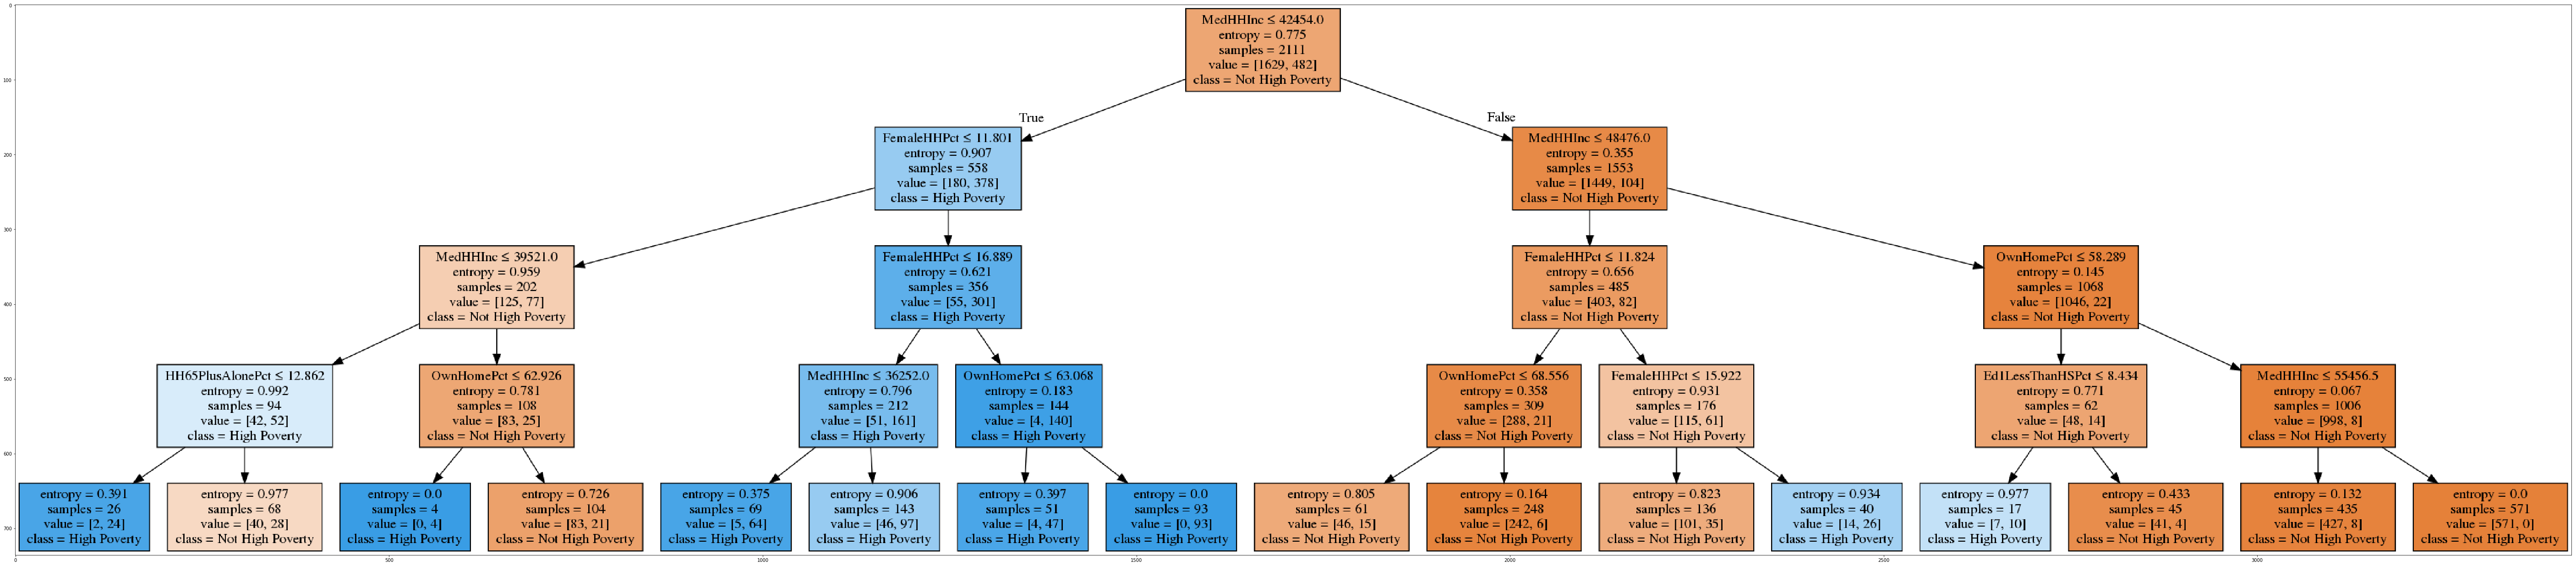

In [150]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

dot_data = StringIO()
filename = "drugtree.png"
featureNames = featuresOfInterest
targetNames = df["Hipov"].unique().tolist()
out=tree.export_graphviz(poorTree,feature_names=featureNames, out_file=dot_data, class_names= ['Not High Poverty', 'High Poverty'], filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')